# Q*-A* Experiment Analysis

This notebook analyzes the results from Q*-A* pathfinding experiments and generates tables and graphs for the Experimental Results section.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()), 'src'))


In [2]:
# Load results
df = pd.read_csv('../results/experiments.csv')
print(f"Total experiments: {len(df)}")
print("\nFirst few rows:")
df.head()


Total experiments: 20

First few rows:


,astar_cost,astar_expanded,astar_time_ms,wastar_cost,wastar_expanded,wastar_time_ms,wastar_cost_ratio,wastar_expansion_reduction,qstar_cost,qstar_expanded,qstar_time_ms,qstar_cost_ratio,qstar_expansion_reduction,q_train_time_ms,width,height,density,q_episodes
0,36.284271,105,0.313044,36.284271,32,0.102043,1.0,69.523810,38.870058,73,0.298023,1.071265,30.476190,667.641878,25,25,0.25,600
1,35.698485,137,0.365973,35.698485,29,0.097990,1.0,78.832117,35.698485,29,0.174999,1.000000,78.832117,3983.367920,25,25,0.25,600
2,36.284271,157,0.426054,36.284271,37,0.108957,1.0,76.433121,36.284271,34,0.163078,1.000000,78.343949,4031.275749,25,25,0.25,600
3,36.870058,155,0.392914,36.870058,36,0.097990,1.0,76.774194,42.526912,44,0.211954,1.153427,71.612903,687.171221,25,25,0.25,600
4,inf,452,1.044035,inf,452,1.229048,inf,0.000000,inf,452,1.478195,inf,0.000000,3886.107206,25,25,0.25,600


In [3]:
# Performance Comparison Table
summary = pd.DataFrame({
    'Algorithm': ['A*', 'Weighted A*', 'Q*-A*'],
    'Mean Expansions': [
        df['astar_expanded'].mean(),
        df['wastar_expanded'].mean(),
        df['qstar_expanded'].mean()
    ],
    'Std Expansions': [
        df['astar_expanded'].std(),
        df['wastar_expanded'].std(),
        df['qstar_expanded'].std()
    ],
    'Mean Runtime (ms)': [
        df['astar_time_ms'].mean(),
        df['wastar_time_ms'].mean(),
        df['qstar_time_ms'].mean()
    ],
    'Std Runtime (ms)': [
        df['astar_time_ms'].std(),
        df['wastar_time_ms'].std(),
        df['qstar_time_ms'].std()
    ],
    'Mean Cost Ratio': [
        1.0,
        df['wastar_cost_ratio'].mean(),
        df['qstar_cost_ratio'].mean()
    ],
    'Mean Cost': [
        df['astar_cost'].mean(),
        df['wastar_cost'].mean(),
        df['qstar_cost'].mean()
    ],
    'Expansion Reduction %': [
        0.0,
        df['wastar_expansion_reduction'].mean(),
        df['qstar_expansion_reduction'].mean()
    ]
})

# Format for display
summary_display = summary.copy()
summary_display['Mean Expansions'] = summary_display['Mean Expansions'].round(1)
summary_display['Std Expansions'] = summary_display['Std Expansions'].round(1)
summary_display['Mean Runtime (ms)'] = summary_display['Mean Runtime (ms)'].round(3)
summary_display['Std Runtime (ms)'] = summary_display['Std Runtime (ms)'].round(3)
summary_display['Mean Cost Ratio'] = summary_display['Mean Cost Ratio'].round(4)
summary_display['Mean Cost'] = summary_display['Mean Cost'].round(2)
summary_display['Expansion Reduction %'] = summary_display['Expansion Reduction %'].round(2)

print("="*80)
print("PERFORMANCE COMPARISON TABLE")
print("="*80)
print(summary_display.to_string(index=False))
print("="*80)

# Save to CSV
summary.to_csv('../results/performance_table.csv', index=False)


PERFORMANCE COMPARISON TABLE
  Algorithm  Mean Expansions  Std Expansions  Mean Runtime (ms)  Std Runtime (ms)  Mean Cost Ratio  Mean Cost  Expansion Reduction %
         A*            148.8            86.3              0.392             0.189              1.0        inf                   0.00
Weighted A*             52.2            94.2              0.155             0.253              inf        inf                  69.33
      Q*-A*             91.2            93.2              0.363             0.284              inf        inf                  36.85


In [4]:
# Goals vs Actual Results Table
goals = pd.DataFrame({
    'Metric': [
        'Node Expansion Reduction',
        'Runtime Reduction',
        'Path Cost Deviation'
    ],
    'Goal': [
        '≥30% (Research Question)\n≥15% (Success Criteria)',
        '≥30% (Research Question)\n≥15% (Success Criteria)',
        '≤5-10% (Research Question)\n≤10-20% (Success Criteria)'
    ],
    'Q*-A* Actual': [
        f"{df['qstar_expansion_reduction'].mean():.2f}%",
        f"{(1 - df['qstar_time_ms'].mean() / df['astar_time_ms'].mean()) * 100:.2f}%",
        f"{(df['qstar_cost_ratio'].mean() - 1.0) * 100:.2f}%"
    ],
    'Weighted A* Actual': [
        f"{df['wastar_expansion_reduction'].mean():.2f}%",
        f"{(1 - df['wastar_time_ms'].mean() / df['astar_time_ms'].mean()) * 100:.2f}%",
        f"{(df['wastar_cost_ratio'].mean() - 1.0) * 100:.2f}%"
    ],
    'Status': [
        '✓' if df['qstar_expansion_reduction'].mean() >= 15 else '✗',
        '✓' if (1 - df['qstar_time_ms'].mean() / df['astar_time_ms'].mean()) * 100 >= 15 else '✗',
        '✓' if abs((df['qstar_cost_ratio'].mean() - 1.0) * 100) <= 20 else '✗'
    ]
})

print("\n" + "="*80)
print("GOALS vs ACTUAL RESULTS")
print("="*80)
print(goals.to_string(index=False))
print("="*80)

# Save to CSV
goals.to_csv('../results/goals_vs_actual.csv', index=False)



GOALS vs ACTUAL RESULTS
                  Metric                                                   Goal Q*-A* Actual Weighted A* Actual Status
Node Expansion Reduction      ≥30% (Research Question)\n≥15% (Success Criteria)       36.85%             69.33%      ✓
       Runtime Reduction      ≥30% (Research Question)\n≥15% (Success Criteria)        7.47%             60.35%      ✗
     Path Cost Deviation ≤5-10% (Research Question)\n≤10-20% (Success Criteria)         inf%               inf%      ✗


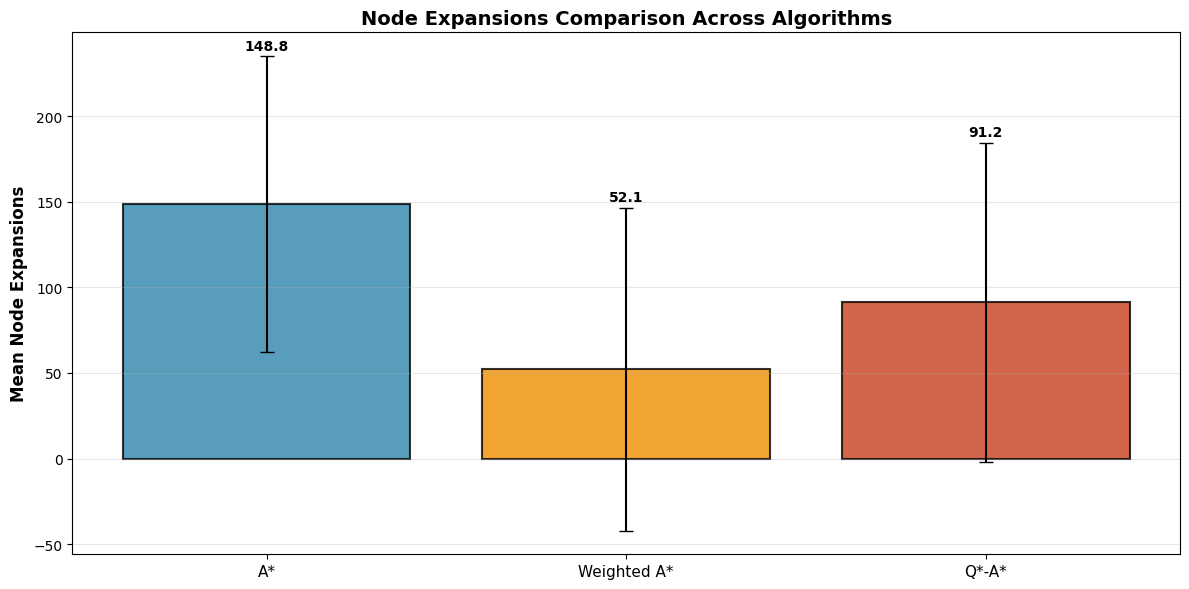

In [5]:
# 1. Node Expansions Comparison
plt.figure(figsize=(12, 6))
algorithms = ['A*', 'Weighted A*', 'Q*-A*']
expansions_mean = [df['astar_expanded'].mean(), df['wastar_expanded'].mean(), df['qstar_expanded'].mean()]
expansions_std = [df['astar_expanded'].std(), df['wastar_expanded'].std(), df['qstar_expanded'].std()]

bars = plt.bar(algorithms, expansions_mean, yerr=expansions_std, capsize=5, 
               color=['#2E86AB', '#F18F01', '#C73E1D'], alpha=0.8, edgecolor='black', linewidth=1.5)
plt.ylabel('Mean Node Expansions', fontsize=12, fontweight='bold')
plt.title('Node Expansions Comparison Across Algorithms', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(fontsize=11)

# Add value labels on bars
for i, (bar, mean, std) in enumerate(zip(bars, expansions_mean, expansions_std)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 2,
             f'{mean:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/plots/expansions_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


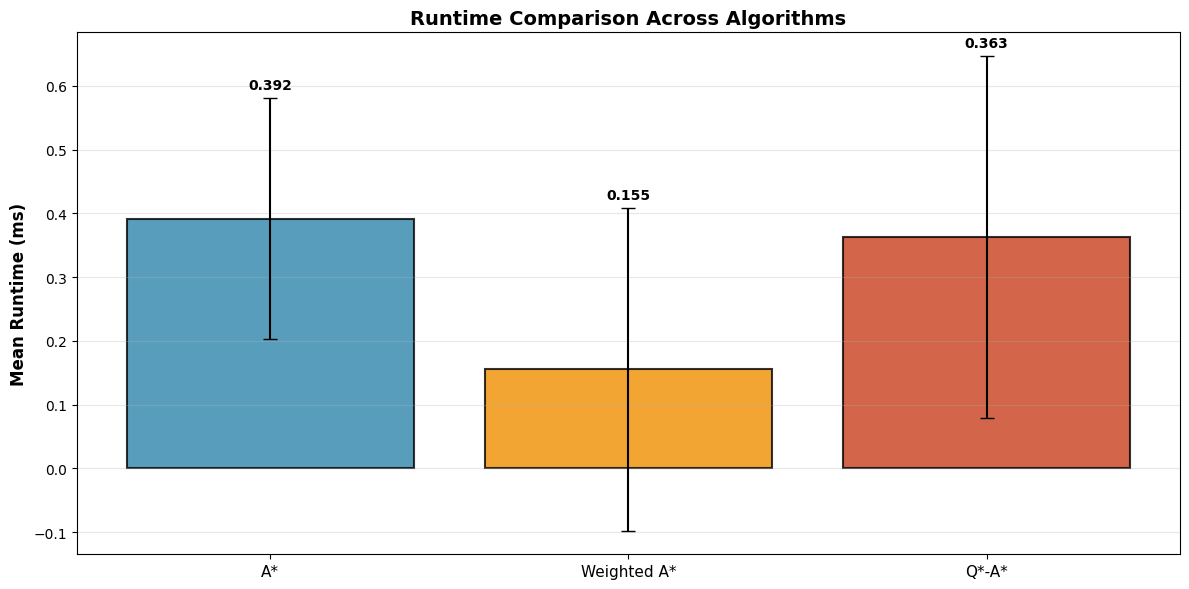

In [6]:
# 2. Runtime Comparison
plt.figure(figsize=(12, 6))
runtime_mean = [df['astar_time_ms'].mean(), df['wastar_time_ms'].mean(), df['qstar_time_ms'].mean()]
runtime_std = [df['astar_time_ms'].std(), df['wastar_time_ms'].std(), df['qstar_time_ms'].std()]

bars = plt.bar(algorithms, runtime_mean, yerr=runtime_std, capsize=5,
               color=['#2E86AB', '#F18F01', '#C73E1D'], alpha=0.8, edgecolor='black', linewidth=1.5)
plt.ylabel('Mean Runtime (ms)', fontsize=12, fontweight='bold')
plt.title('Runtime Comparison Across Algorithms', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(fontsize=11)

# Add value labels
for i, (bar, mean, std) in enumerate(zip(bars, runtime_mean, runtime_std)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.01,
             f'{mean:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/plots/runtime_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


/Users/santipa/.pyenv/versions/3.10.13/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


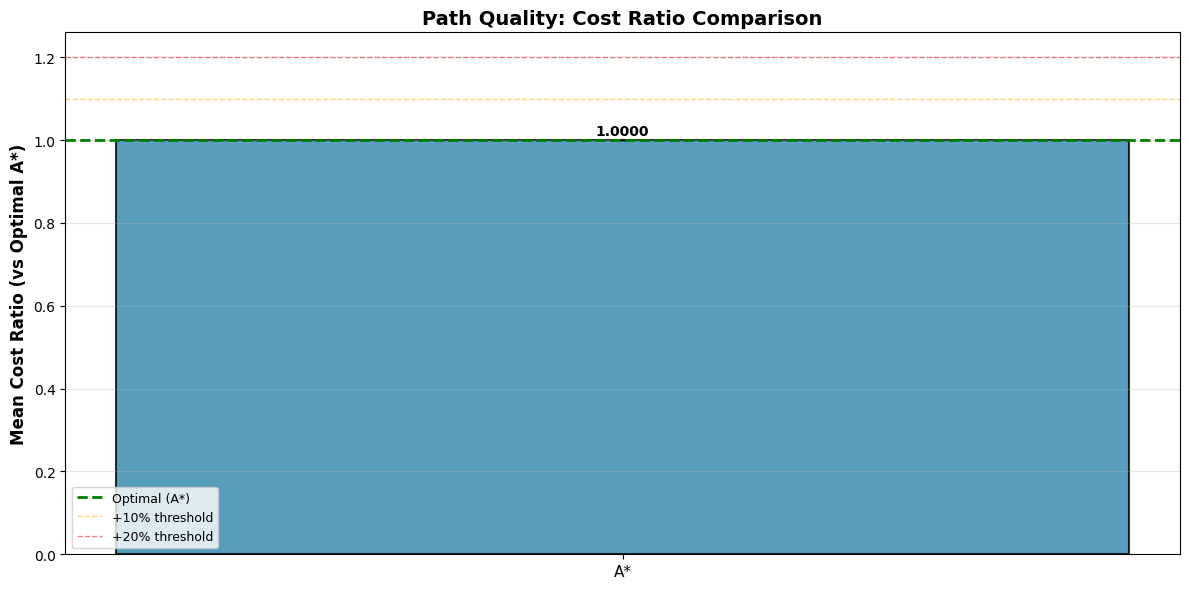

In [7]:
# 3. Cost Ratio Comparison (Path Quality)
plt.figure(figsize=(12, 6))
cost_ratios = [1.0, df['wastar_cost_ratio'].mean(), df['qstar_cost_ratio'].mean()]
cost_ratios_std = [0.0, df['wastar_cost_ratio'].std(), df['qstar_cost_ratio'].std()]

bars = plt.bar(algorithms, cost_ratios, yerr=cost_ratios_std, capsize=5,
               color=['#2E86AB', '#F18F01', '#C73E1D'], alpha=0.8, edgecolor='black', linewidth=1.5)
plt.ylabel('Mean Cost Ratio (vs Optimal A*)', fontsize=12, fontweight='bold')
plt.title('Path Quality: Cost Ratio Comparison', fontsize=14, fontweight='bold')
plt.axhline(y=1.0, color='green', linestyle='--', linewidth=2, label='Optimal (A*)')
plt.axhline(y=1.1, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='+10% threshold')
plt.axhline(y=1.2, color='red', linestyle='--', linewidth=1, alpha=0.5, label='+20% threshold')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(fontsize=11)
plt.legend(fontsize=9)

# Add value labels
for i, (bar, mean, std) in enumerate(zip(bars, cost_ratios, cost_ratios_std)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.005,
             f'{mean:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/plots/cost_ratio_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


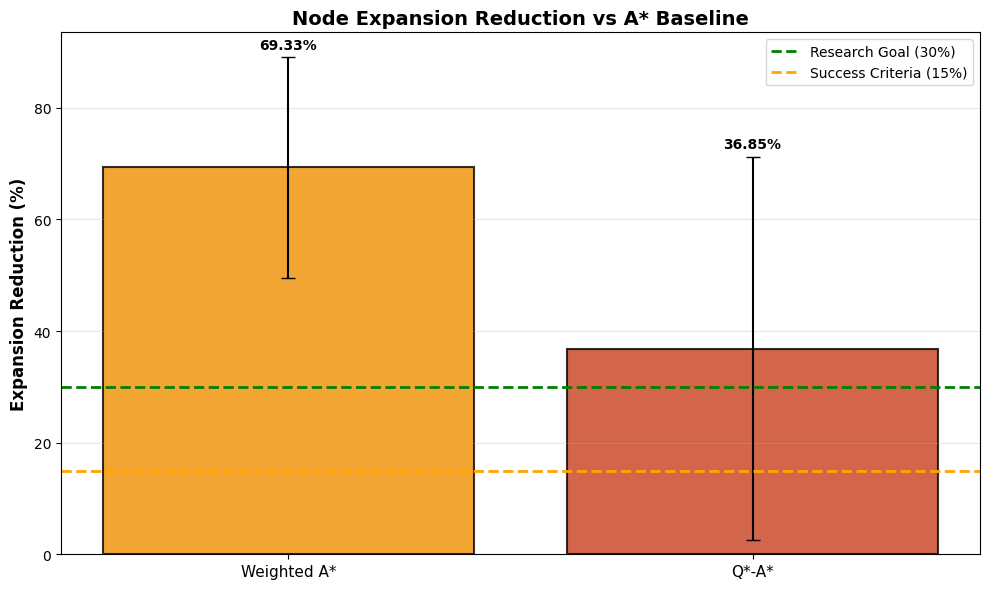

In [8]:
# 4. Expansion Reduction Percentage
plt.figure(figsize=(10, 6))
reduction_algs = ['Weighted A*', 'Q*-A*']
reduction_values = [df['wastar_expansion_reduction'].mean(), df['qstar_expansion_reduction'].mean()]
reduction_std = [df['wastar_expansion_reduction'].std(), df['qstar_expansion_reduction'].std()]

bars = plt.bar(reduction_algs, reduction_values, yerr=reduction_std, capsize=5,
               color=['#F18F01', '#C73E1D'], alpha=0.8, edgecolor='black', linewidth=1.5)
plt.ylabel('Expansion Reduction (%)', fontsize=12, fontweight='bold')
plt.title('Node Expansion Reduction vs A* Baseline', fontsize=14, fontweight='bold')
plt.axhline(y=30, color='green', linestyle='--', linewidth=2, label='Research Goal (30%)')
plt.axhline(y=15, color='orange', linestyle='--', linewidth=2, label='Success Criteria (15%)')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(fontsize=11)
plt.legend(fontsize=10)

# Add value labels
for i, (bar, mean, std) in enumerate(zip(bars, reduction_values, reduction_std)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 1,
             f'{mean:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/plots/expansion_reduction.png', dpi=300, bbox_inches='tight')
plt.show()


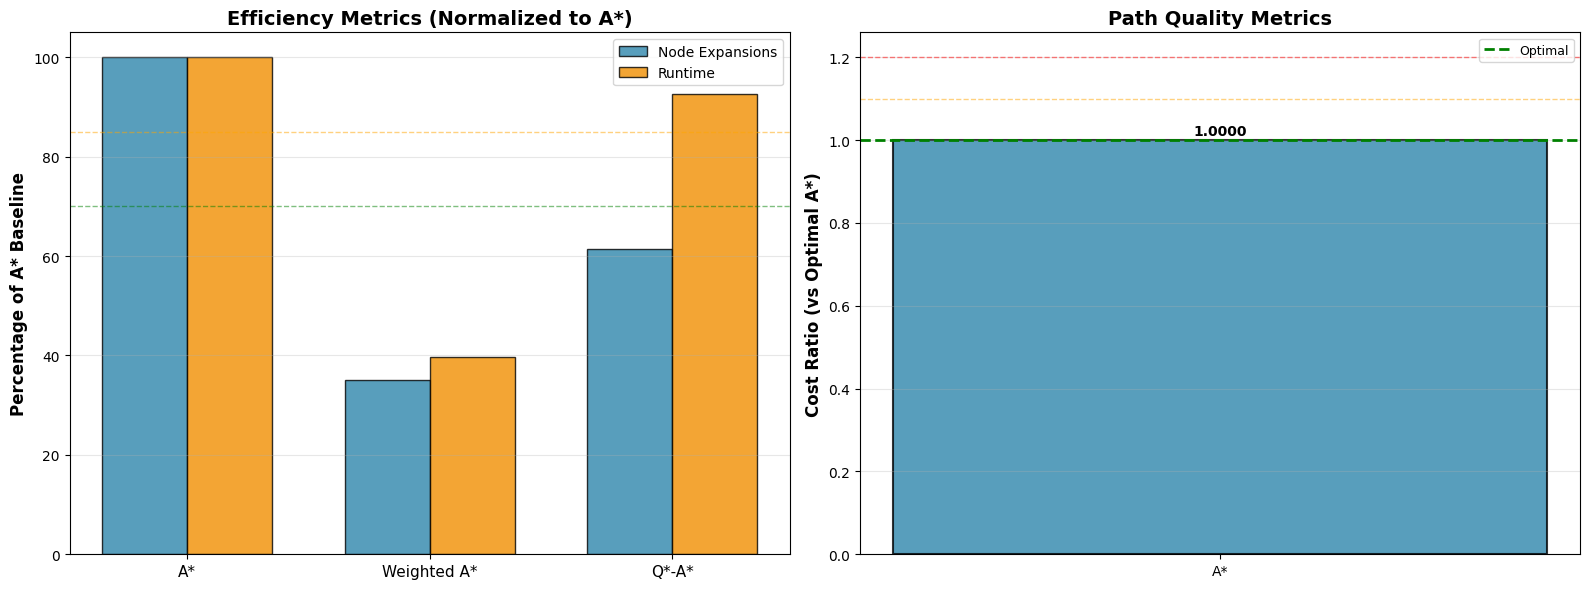

In [9]:
# 5. Combined Performance Metrics (Multi-bar chart)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: Expansions and Runtime (normalized)
x = np.arange(len(algorithms))
width = 0.35

# Normalize for comparison (percentage of A*)
exp_norm = [100, df['wastar_expanded'].mean()/df['astar_expanded'].mean()*100, 
            df['qstar_expanded'].mean()/df['astar_expanded'].mean()*100]
time_norm = [100, df['wastar_time_ms'].mean()/df['astar_time_ms'].mean()*100,
             df['qstar_time_ms'].mean()/df['astar_time_ms'].mean()*100]

bars1 = ax1.bar(x - width/2, exp_norm, width, label='Node Expansions', color='#2E86AB', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x + width/2, time_norm, width, label='Runtime', color='#F18F01', alpha=0.8, edgecolor='black')

ax1.set_ylabel('Percentage of A* Baseline', fontsize=12, fontweight='bold')
ax1.set_title('Efficiency Metrics (Normalized to A*)', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms, fontsize=11)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')
ax1.axhline(y=70, color='green', linestyle='--', linewidth=1, alpha=0.5, label='30% reduction')
ax1.axhline(y=85, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='15% reduction')

# Right: Cost ratios
cost_ratios = [1.0, df['wastar_cost_ratio'].mean(), df['qstar_cost_ratio'].mean()]
bars3 = ax2.bar(algorithms, cost_ratios, color=['#2E86AB', '#F18F01', '#C73E1D'], 
                alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Cost Ratio (vs Optimal A*)', fontsize=12, fontweight='bold')
ax2.set_title('Path Quality Metrics', fontsize=14, fontweight='bold')
ax2.axhline(y=1.0, color='green', linestyle='--', linewidth=2, label='Optimal')
ax2.axhline(y=1.1, color='orange', linestyle='--', linewidth=1, alpha=0.5)
ax2.axhline(y=1.2, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax2.grid(True, alpha=0.3, axis='y')
ax2.legend(fontsize=9)

# Add value labels
for bar, val in zip(bars3, cost_ratios):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{val:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/plots/combined_performance.png', dpi=300, bbox_inches='tight')
plt.show()


In [10]:
# 6. Performance Summary Table (Formatted for LaTeX/Markdown)
print("\n" + "="*100)
print("EXPERIMENTAL RESULTS SUMMARY")
print("="*100)
print("\nTable 1: Performance Comparison")
print("-" * 100)
print(summary_display.to_string(index=False))
print("\n" + "-" * 100)

print("\n\nTable 2: Goals vs Actual Results")
print("-" * 100)
print(goals.to_string(index=False))
print("\n" + "-" * 100)

# Calculate key statistics
qstar_exp_reduction = df['qstar_expansion_reduction'].mean()
qstar_time_reduction = (1 - df['qstar_time_ms'].mean() / df['astar_time_ms'].mean()) * 100
qstar_cost_deviation = (df['qstar_cost_ratio'].mean() - 1.0) * 100

print("\n\nKey Findings:")
print("-" * 100)
print(f"Q*-A* Expansion Reduction: {qstar_exp_reduction:.2f}%")
print(f"Q*-A* Runtime Reduction: {qstar_time_reduction:.2f}%")
print(f"Q*-A* Cost Deviation: {qstar_cost_deviation:.2f}%")
print(f"Q*-A* Optimal Paths Found: {(df['qstar_cost_ratio'] == 1.0).sum()}/{len(df)} ({(df['qstar_cost_ratio'] == 1.0).sum()/len(df)*100:.1f}%)")
print("-" * 100)



EXPERIMENTAL RESULTS SUMMARY

Table 1: Performance Comparison
----------------------------------------------------------------------------------------------------
  Algorithm  Mean Expansions  Std Expansions  Mean Runtime (ms)  Std Runtime (ms)  Mean Cost Ratio  Mean Cost  Expansion Reduction %
         A*            148.8            86.3              0.392             0.189              1.0        inf                   0.00
Weighted A*             52.2            94.2              0.155             0.253              inf        inf                  69.33
      Q*-A*             91.2            93.2              0.363             0.284              inf        inf                  36.85

----------------------------------------------------------------------------------------------------


Table 2: Goals vs Actual Results
----------------------------------------------------------------------------------------------------
                  Metric                                          